<a href="https://colab.research.google.com/github/hayleypc/HawaiiClimate/blob/main/HI_SOC_munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('data.table','ggplot2','magrittr','googledrive','openxlsx','stringr'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(data.table)
library(ggplot2)
library(magrittr)
library(googledrive)
library(openxlsx)
library(stringr)

In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=69903bdc5e7e2014f2ce02d91828218b&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQVFsRWQ4dzdhSmp0UHc4SlFfOElCN2pQZVUzTTA1eW9iVkg5alNsY2V5dHBjV3oyQWFfc2VmWXdGaV82WUVVYWZZcS11dyIsInN0YXRlIjoiNjk5MDNiZGM1ZTdlMjAxNGYyY2UwMmQ5MTgyODIxOGIifQ==


Soil Health Database master version - still missing hundreds of more recent samples

In [4]:
# https://docs.google.com/spreadsheets/d/1Fy7yqIll2RTXDbLgb8ENBAbWaeton7skdC9M0vkripM/edit#gid=0
drive_download(file = as_id('1Fy7yqIll2RTXDbLgb8ENBAbWaeton7skdC9M0vkripM'), path = '/content/SH_master.csv', overwrite = TRUE)

File downloaded:

• Copy of HSH_MASTER_DATABASEallsamples
  <id: 1Fy7yqIll2RTXDbLgb8ENBAbWaeton7skdC9M0vkripM>

Saved locally as:

• /content/SH_master.csv



FIA Data

In [5]:
# https://drive.google.com/file/d/1wGx6RbEyorRCy9Xhm_WdfpHmAUbkuzMk/view?usp=drive_link
drive_download(file = as_id('1wGx6RbEyorRCy9Xhm_WdfpHmAUbkuzMk'), path = '/content/FIA.csv', overwrite = TRUE)

FIA_dt <- read.csv('/content/FIA.csv') %>% as.data.table()
head(FIA_dt)

FIA_dt[,plot_hole_id := paste0('FIA_',PLOT)]
FIA_dt[,soil_column_id := paste0('FIA_',PLOT)]

File downloaded:

• 2023_11_01FIA_soilcstocks.csv <id: 1wGx6RbEyorRCy9Xhm_WdfpHmAUbkuzMk>

Saved locally as:

• /content/FIA.csv



PLOT,INVYR,CN_loc,STATECD_loc,COUNTYCD_loc,SUBP_loc,INV_VST_NBR_loc,PLT_CN_loc,CYCLE_loc,CONDID,⋯,TOPO_POSITION_PNW,REMPER,NBP_CN,CONSERVATION_ZONE,Sum_C_TOTAL_PCT,NOTES_FLAG,SOC_Mg_Ac,SOC_Mg_Ha,Sum_SOC_Mg_Ha,Proportion_C_Stock
<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,35.07369,86.66884,298.8214,0.2900356
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,33.76894,83.44473,298.8214,0.2792462
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,20.08232,49.62441,298.8214,0.1660671
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,18.03497,44.56532,298.8214,0.1491370
1060,2019,1.219122e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,NA,4.819775e+13,,12.16,,13.96901,34.51811,298.8214,0.1155142
1076,2019,1.219123e+15,15,7,2,1,4.975537e+14,3,1,⋯,4,6.6,4.819776e+13,P,32.84,,33.67137,83.20364,325.0640,0.2559608


In [6]:
FIA_dt$soil_column_id %>% table %>% unlist %>% table

.
 5 
86 

Soil C Database Data

In [7]:
# https://docs.google.com/spreadsheets/d/1sQNRTzcJtP8-qqjD995maEcKe9m_f7hM5ddwI-D4iH4/edit?usp=sharing
drive_download(file = as_id('1sQNRTzcJtP8-qqjD995maEcKe9m_f7hM5ddwI-D4iH4'), path = '/content/HISOC_dbase.csv', overwrite = TRUE)

File downloaded:

• HI_soil_C_crow_data_REV <id: 1sQNRTzcJtP8-qqjD995maEcKe9m_f7hM5ddwI-D4iH4>

Saved locally as:

• /content/HISOC_dbase.csv



In [8]:
HISOC_dbase_dt <- read.csv('/content/HISOC_dbase.csv') %>% as.data.table()

In [9]:
missing_group_by <- HISOC_dbase_dt[group_by_id == '',]
missing_group_by[, group_by_id := 1]

# Initialize field ID
missing_group_by[, group_by_id := cumsum(depth_upper_cm <= shift(depth_upper_cm, fill = 0)), by = group_by_id]

In [10]:
manual_group_by <- HISOC_dbase_dt[group_by_id != '',]

manual_group_by$group_by_id <- (manual_group_by$group_by_id %>% factor() %>% as.numeric) + max(missing_group_by$group_by_id %>% as.numeric)

HISOC_dbase_dt <- list(manual_group_by,missing_group_by) %>% rbindlist

HISOC_dbase_dt$soil_column_id <- paste0("HISOC",HISOC_dbase_dt$group_by_id)

In [11]:
HISOC_dbase_dt$soil_column_id  %>% table %>% unlist %>% table

.
  1   2   3   4   5   6   7   8   9  10  11  12 
284 124  71  64 285 419   5   2   2   1   1  37 

In [12]:
colnames(HISOC_dbase_dt) <- tolower(colnames(HISOC_dbase_dt))
colnames(HISOC_dbase_dt) <- gsub("\\.+", "_", colnames(HISOC_dbase_dt))

names(HISOC_dbase_dt)

[1] "pubid"                               
 [2] "dataid"                              
 [3] "date_sampled"                        
 [4] "island"                              
 [5] "location"                            
 [6] "latitude"                            
 [7] "longitude"                           
 [8] "land_use"                            
 [9] "soil_cover"                          
[10] "soil_order"                          
[11] "soil_series"                         
[12] "soil_taxonomy"                       
[13] "group_by_id"                         
[14] "depth_upper_cm"                      
[15] "depth_lower_cm"                      
[16] "soil_depth_m_"                       
[17] "x_c"                                 
[18] "x_c_1"                               
[19] "c_perc"                              
[20] "tc_mg_c_ha_"                         
[21] "bulk_density_g_cm3_or_mg_m3_or_kg_l_"
[22] "c_n"                                 
[23] "soil_ph"                             
[24] "x_n"                                 
[25] "tn_mg_ha_"                           
[26] "p_kg_ha_"                            
[27] "elevation_m_"                        
[28] "mat_c_"                              
[29] "map_mm_"                             
[30] "soil_sampling"                       
[31] "previous_land_use"                   
[32] "previous_plant_cover"                
[33] "fertilizer_type"                     
[34] "fertilizer_rate_not_required_"       
[35] "tillage_type"                        
[36] "tillage_frequency"                   
[37] "herbicide"                           
[38] "pesticide"                           
[39] "irrigation_type"                     
[40] "additional_soil_cover"               
[41] "soil_column_id"

In [13]:
# HISOC_dbase_dt$depth_lower_cm %>% unique

# HISOC_dbase_dt$depth_lower_cm %>% qplot

In [14]:
# depth_counts <- table(HISOC_dbase_dt$depth_lower_cm < 15, HISOC_dbase_dt$depth_lower_cm < 20)

# print(depth_counts)

In [15]:
# HISOC_dbase_dt$tc_mg_c_ha_ %>% qplot

In [16]:
HISOC_dbase_dt[, unique_id := .I]

HISOC_dbase_dt[, unique_id := paste0("HISOC", unique_id)]

In [17]:
HISOC_dbase_dt[, c("depth_top", "depth_bottom") := .(depth_upper_cm, depth_lower_cm)][, c("depth_upper_cm", "depth_lower_cm") := NULL]

In [18]:
all(HISOC_dbase_dt$longitude < 0)

HISOC_dbase_dt[, longitude := -abs(longitude)]

all(HISOC_dbase_dt$longitude < 0)

[1] FALSE

[1] TRUE

In [19]:
HISOC_dbase_dt[is.na(longitude) | longitude == "" | is.na(latitude) | latitude == "", .(unique_id, depth_top, depth_bottom)]

unique_id,depth_top,depth_bottom
<chr>,<int>,<dbl>


In [20]:
setnames(HISOC_dbase_dt, old = c("bulk_density_g_cm3_or_mg_m3_or_kg_l_"), new = c("bulk_density"),skip_absent=TRUE)

setnames(HISOC_dbase_dt, old = c("bd"), new = c("bulk_density"),skip_absent=TRUE)

setnames(HISOC_dbase_dt, old = c("toc"), new = c("c_perc"),skip_absent=TRUE)
setnames(HISOC_dbase_dt, old = c('depth_bottom '), new = c("depth_bottom"),skip_absent=TRUE)
setnames(HISOC_dbase_dt, old = c('depth_top '), new = c("depth_top"),skip_absent=TRUE)

Soil Health Dataset munging below

In [21]:
SH_master_dt <- read.csv('/content/SH_master.csv') %>% as.data.table()

setnames(SH_master_dt, as.character(unlist(SH_master_dt[1,])))
SH_master_dt <- SH_master_dt[-1]
setnames(SH_master_dt, tolower(names(SH_master_dt)))

In [22]:
SH_master_dt$soil_column_id %>% table %>% unlist %>% table

.
  1   2   3   4   6  10  15  24 
482   9  75   1  21   1   4   1 

In [23]:
SH_master_dt[, site_name := tolower(gsub("[[:punct:]]", "", site_name))]

In [24]:
SH_master_dt[current_land_use == "crop land", current_land_use := "cropland"]

In [25]:
SH_master_dt[, unique_id := .I]

SH_master_dt[, unique_id := paste0("SH", unique_id)]


Note for missing lat and long additions (used best guess, approximate):
Island Harvest: 20.222911, -155.778804;
Kakoo oiwi coordinates (from NRDS): -157.8199032181131 21.4313439248623; Neem Farm Waimea Kauai (assuming this: https://www.waikahefarms.com/) coordinates: 21.967096, -159.692819; kualoa ranch: 21.518554, -157.852945; kapanaia farms: 20.227278, -155.758747; thrive farm: 21.335436, -157.714816; waialua coffee: 21.551691, -158.134685; diamond island farm: 21.586282, -158.106080; kokua: 21.586007, -158.105091



removed kona macnuts, susans nuts, milolii, kialoakaa, g tree, growing together, lonohana, hoomau, kemoo

In [26]:
sum(is.na(SH_master_dt$bd) | SH_master_dt$bd == "") %>% print

[1] 524


In [27]:
sum(!is.na(SH_master_dt$bd) | SH_master_dt$bd == "") %>% print

[1] 949


In [28]:
setnames(SH_master_dt, old = c('depth_top ', 'depth_bottom '), new = c('depth_top', 'depth_bottom'))

In [29]:
SH_master_dt$c_perc <- SH_master_dt$toc %>% as.numeric

FIA munging below

In [30]:
colnames(FIA_dt) <- tolower(colnames(FIA_dt))

In [31]:

FIA_dt[, c("depth_top", "depth_bottom") := tstrsplit(str_extract(layer_type, "\\d+_\\d+"), "_")]
FIA_dt[, c("depth_top", "depth_bottom") := lapply(.SD, as.numeric), .SDcols = c("depth_top", "depth_bottom")]

In [32]:
FIA_dt$depth_top %>% unique
FIA_dt$depth_bottom %>% unique

[1]  0 20 40 60 80

[1]  20  40  60  80 100

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


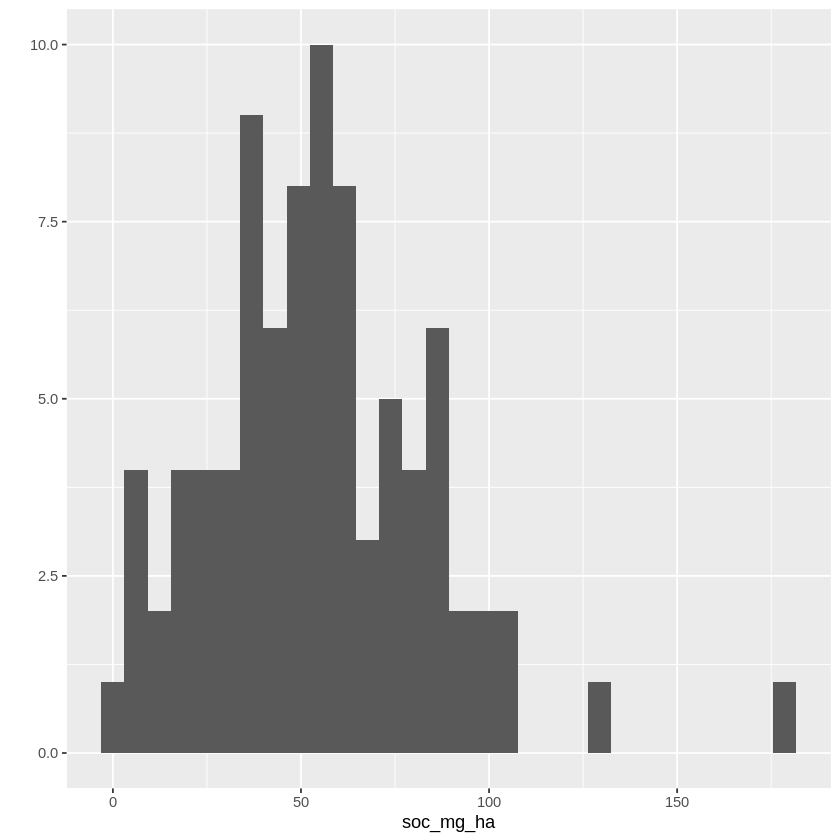

In [33]:
 subset_data <- FIA_dt[depth_bottom == '20']

 qplot(data = subset_data, x = soc_mg_ha)

In [34]:
FIA_dt[, unique_id := .I]

FIA_dt[, unique_id := paste0("FIA", unique_id)]

In [35]:
names(FIA_dt)

[1] "plot"                           "invyr"                         
  [3] "cn_loc"                         "statecd_loc"                   
  [5] "countycd_loc"                   "subp_loc"                      
  [7] "inv_vst_nbr_loc"                "plt_cn_loc"                    
  [9] "cycle_loc"                      "condid"                        
 [11] "created_by"                     "created_date"                  
 [13] "created_in_instance"            "modified_by"                   
 [15] "modified_date"                  "modified_in_instance"          
 [17] "notes"                          "notes_office_loc"              
 [19] "soils_sample_method_cd"         "soils_sample_status_cd"        
 [21] "unitcd"                         "used_in_estimation_cd"         
 [23] "vstnbr_loc"                     "cn_lyr"                        
 [25] "statecd_lyr"                    "countycd_lyr"                  
 [27] "subp_lyr"                       "inv_vst_nbr_lyr"               
 [29] "plt_cn_lyr"                     "cycle_lyr"                     
 [31] "subcycle_lyr"                   "bulk_density"                  
 [33] "bulk_density_fines"             "c_inorg_pct"                   
 [35] "c_mg_ac"                        "c_total_pct"                   
 [37] "coarse_fraction_pct"            "field_sample_lbl"              
 [39] "layer_collected_cd"             "layer_thickness"               
 [41] "layer_type"                     "n_mg_ac"                       
 [43] "n_total_pct"                    "sample_dia"                    
 [45] "sampler_type"                   "soil_samp_per_ac"              
 [47] "sssl_cn"                        "vstnbr_lyr"                    
 [49] "wt_field_moist"                 "wt_oven_dry"                   
 [51] "wt_rock"                        "cn"                            
 [53] "srv_cn"                         "cty_cn"                        
 [55] "measyear"                       "statecd"                       
 [57] "countycd"                       "island_grp"                    
 [59] "county.name"                    "unitcd_plot"                   
 [61] "plot_status_cd"                 "congcd"                        
 [63] "declination"                    "designcd"                      
 [65] "ecosubcd"                       "elev"                          
 [67] "intensity"                      "invasive_sampling_status_cd"   
 [69] "invasive_specimen_rule_cd"      "kindcd"                        
 [71] "lat"                            "lon"                           
 [73] "manual"                         "measmon"                       
 [75] "measday"                        "microplot_loc"                 
 [77] "nf_sampling_status_cd"          "p2veg_sampling_status_cd"      
 [79] "p2veg_sampling_level_detail_cd" "precipitation"                 
 [81] "qa_status"                      "rddistcd"                      
 [83] "samp_method_cd"                 "subp_examine_cd"               
 [85] "watercd"                        "cycle"                         
 [87] "subcycle"                       "p2panel"                       
 [89] "subpanel"                       "prev_plt_cn"                   
 [91] "island"                         "rgn_flg"                       
 [93] "notes_plot"                     "notes_office"                  
 [95] "geographic_area"                "topo_position_pnw"             
 [97] "remper"                         "nbp_cn"                        
 [99] "conservation_zone"              "sum_c_total_pct"               
[101] "notes_flag"                     "soc_mg_ac"                     
[103] "soc_mg_ha"                      "sum_soc_mg_ha"                 
[105] "proportion_c_stock"             "plot_hole_id"                  
[107] "soil_column_id"                 "depth_top"                     
[109] "depth_bottom"                   "unique_id"

In [36]:
FIA_dt[, c("latitude", "longitude") := .(lat, lon)][, c("lat", "lon") := NULL]

In [37]:
setnames(FIA_dt, old = c("c_total_pct"), new = c("c_perc"))

In [38]:
combined_dt <- rbindlist(list(SH_master_dt, HISOC_dbase_dt, FIA_dt), use.names = TRUE, fill = TRUE)

combine all three datasets

plot c percent vs. bulk density for each depth set, then group into logical groupings to use mean or distribution of bulk density values for the rest of the C values that don't have them

In [39]:
range(combined_dt$bulk_density, na.rm = TRUE)
range(combined_dt$c_perc, na.rm = TRUE)

[1] 0.017367 2.215000

[1]  0.06 72.00

In [40]:
combined_dt[, bulk_density := as.numeric(bulk_density)]

In [41]:
combined_dt[, c_perc := as.numeric(c_perc)]

In [42]:
summary(combined_dt$c_perc)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.060   0.600   1.400   4.104   6.070  72.000      51 

In [43]:
sum(combined_dt$c_perc > 40, na.rm = TRUE)

[1] 21

below for just the depths to 15 and 20 cm

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1440 rows containing missing values or values outside the scale range
(`geom_point()`).”


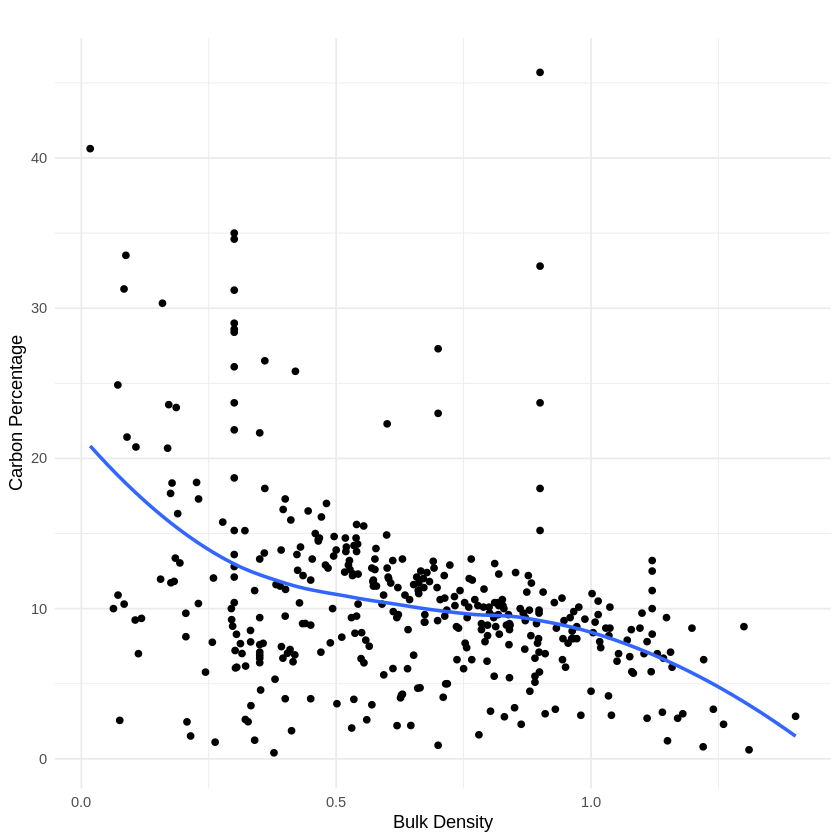

In [44]:
 subset_data <- combined_dt[depth_bottom %in% c(15, 20),]

ggplot(subset_data, aes(x = bulk_density, y = c_perc, na.rm = TRUE)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE) +
  labs(x = "Bulk Density", y = "Carbon Percentage",
       title = "") +
  theme_minimal()


In [45]:
# source dataset identifiers
combined_dt[, source_dataset := sub("(\\D+).*", "\\1", unique_id)]


In [46]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("HISOC", "SH", "FIA"))]

In [47]:
names(combined_dt)

[1] "number"                                    
  [2] "site_name"                                 
  [3] "site_number"                               
  [4] "plot_name"                                 
  [5] "plot_area"                                 
  [6] "depth_top"                                 
  [7] "depth_bottom"                              
  [8] "soil_column_id"                            
  [9] "replicate"                                 
 [10] "latitude"                                  
 [11] "longitude"                                 
 [12] "primary_project"                           
 [13] "secondary_project"                         
 [14] "tertiary project"                          
 [15] "land_ownership"                            
 [16] "old_sh_1"                                  
 [17] "sh_1"                                      
 [18] "barcode"                                   
 [19] "date_sampled"                              
 [20] "island"                                    
 [21] "current_land_use"                          
 [22] "years_under_current_land_use"              
 [23] "most_previous_land_use"                    
 [24] "years_under_most_previous _land_use"       
 [25] "additional_previous _land_use "            
 [26] "years_under_additional_previous _land_use" 
 [27] "additional_previous_land_use_2"            
 [28] "years_under_additional_previous_land_use_2"
 [29] "additional_previous_land_use_3"            
 [30] "years_under_additional_previous_land_use_3"
 [31] "current_plant_cover"                       
 [32] "previous_crop_cover"                       
 [33] "tillage"                                   
 [34] "tillage_frequency"                         
 [35] "herbicide"                                 
 [36] "pesticide"                                 
 [37] "irrigation_type"                           
 [38] "additional_soil_cover"                     
 [39] "soil_series"                               
 [40] "management_category"                       
 [41] "pial_none"                                 
 [42] "distlevel"                                 
 [43] "order"                                     
 [44] "minerals"                                  
 [45] "swc_fm"                                    
 [46] "swc_ad"                                    
 [47] "toc"                                       
 [48] "tn"                                        
 [49] "co2_burst"                                 
 [50] "beta_glucosidase"                          
 [51] "beta_glucosaminidase"                      
 [52] "pnm_init"                                  
 [53] "pmn_fin"                                   
 [54] "ph"                                        
 [55] "doc"                                       
 [56] "tdn"                                       
 [57] "din"                                       
 [58] "don"                                       
 [59] "hwec"                                      
 [60] "hwen"                                      
 [61] "whc"                                       
 [62] "wsa_mega"                                  
 [63] "wsa_macro"                                 
 [64] "bd"                                        
 [65] "shs"                                       
 [66] "assessment"                                
 [67] "c_n"                                       
 [68] "doc_don"                                   
 [69] "pmn"                                       
 [70] "status"                                    
 [71] "hyperlinks"                                
 [72] "last updated"                              
 [73] "unique_id"                                 
 [74] "c_perc"                                    
 [75] "pubid"                                     
 [76] "dataid"                                    
 [77] "location"                                  
 [78] "land_use"                                  
 [79] "soil_cover"      

In [48]:
combined_dt[, .(source_dataset, c_perc)]$c_perc %>% is.na  %>% table

.
FALSE  TRUE 
 6802    51 

Warning message:
“Removed 51 rows containing non-finite outside the scale range (`stat_bin()`).”


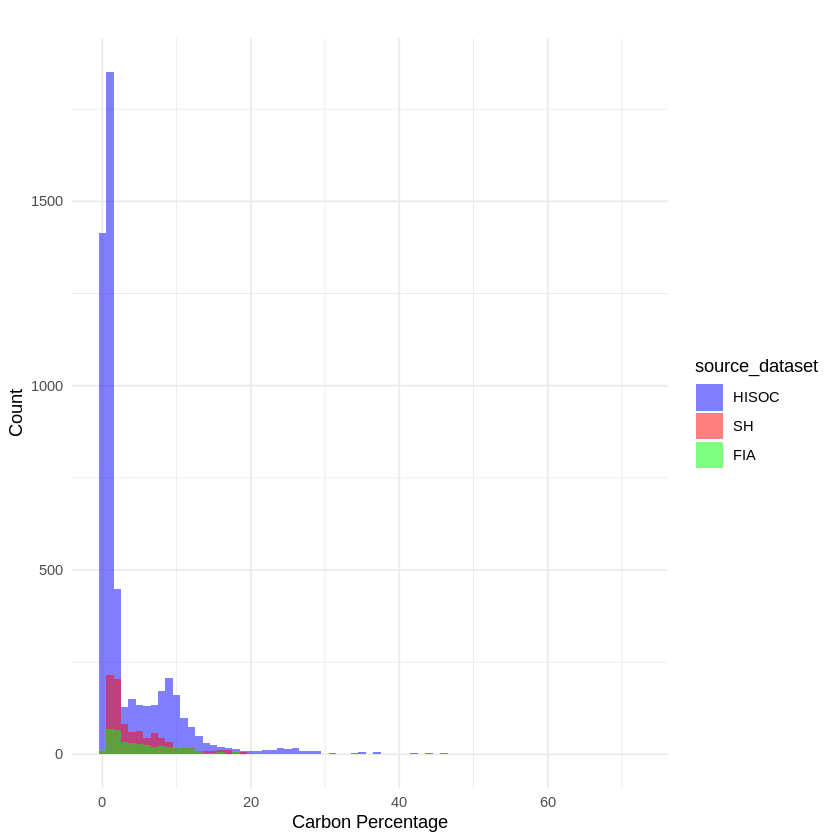

In [49]:

ggplot(combined_dt, aes(x = c_perc, fill = source_dataset)) +
  geom_histogram(position = "identity", alpha = 0.5, binwidth = 1) +
  labs(x = "Carbon Percentage", y = "Count", title = "") +
  theme_minimal() +
  scale_fill_manual(values = c("HISOC" = "blue", "SH" = "red", "FIA" = "green"))

Warning message:
“Removed 41 rows containing non-finite outside the scale range (`stat_bin()`).”


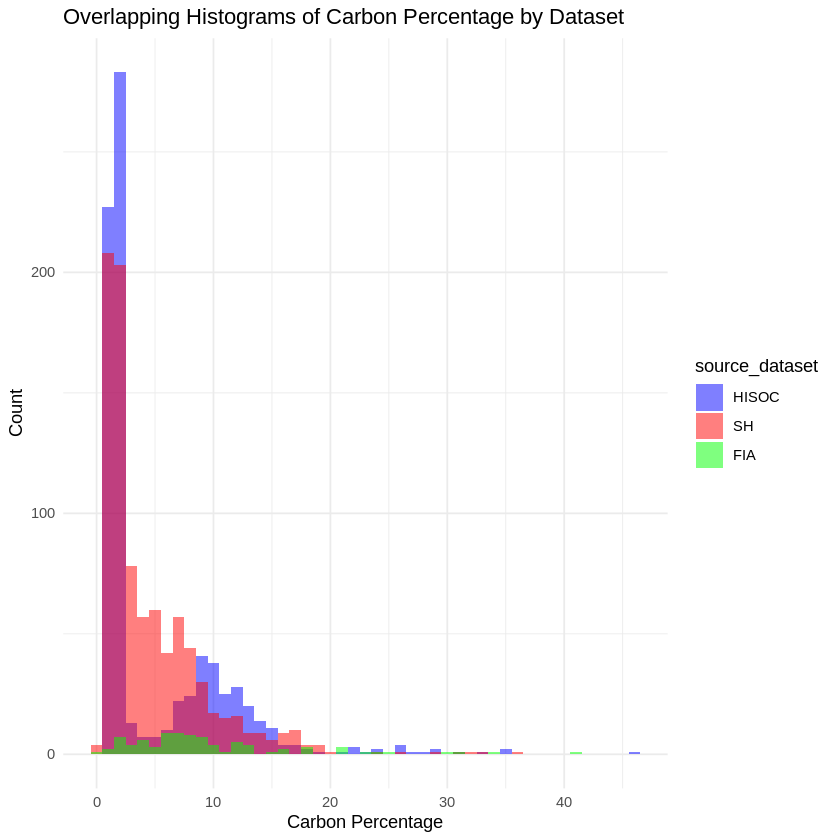

In [50]:
 combined_dt[, source_dataset := factor(source_dataset, levels = c("HISOC", "SH", "FIA"))]

 subset_data <- combined_dt[depth_bottom %in% c(15, 20),]

 ggplot(subset_data, aes(x = c_perc, fill = source_dataset)) +
  geom_histogram(position = "identity", alpha = 0.5, binwidth = 1) +
  labs(x = "Carbon Percentage", y = "Count", title = "Overlapping Histograms of Carbon Percentage by Dataset") +
  theme_minimal() +
  scale_fill_manual(values = c("HISOC" = "blue", "SH" = "red", "FIA" = "green"))

In [51]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("FIA", "HISOC", "SH"))]

subset_data <- combined_dt[depth_bottom %in% c(15, 20),]

#colnames(subset_data)

subset_data$minerals

# subset_data[source_dataset == "SH"]

[1] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "LAC"  "LAC"  "LAC"  "LAC" 
  [11] "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC"  "LAC"  "LAC" 
  [21] "LAC"  "LAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
  [31] "HAC"  "HAC"  "HAC"  "PNCM" "PNCM" "PNCM" "LAC"  "LAC"  "LAC"  "PNCM"
  [41] "PNCM" "PNCM" "LAC"  "LAC"  "LAC"  "PNCM" "PNCM" "PNCM" "PNCM" "PNCM"
  [51] "PNCM" "HIST" "HIST" "HIST" "PNCM" "PNCM" "PNCM" "LAC"  "LAC"  "LAC" 
  [61] "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC"  "HAC" 
  [71] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
  [81] "HAC"  "HAC"  "HAC"  "HAC"  "LAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC" 
  [91] "HAC"  "HAC"  "HAC"  "Sand" "Sand" "Sand" "Sand" "Sand" "Sand" "Sand"
 [101] "Sand" "Sand" "PNCM" "PNCM" "PNCM" "PNCM" "PNCM" "PNCM" "PNCM" "PNCM"
 [111] "PNCM" "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC" 
 [121] "LAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [131] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [141] "HAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [151] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [161] "HAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC" 
 [171] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "LAC"  "LAC"  "LAC"  "HAC"  "HAC" 
 [181] "HAC"  "HAC"  "HAC"  "HAC"  "LAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC" 
 [191] "LAC"  "LAC"  "LAC"  "Sand" "Sand" "Sand" "LAC"  "LAC"  "LAC"  "HAC" 
 [201] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [211] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [221] "HAC"  "HAC"  "HAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "LAC" 
 [231] "LAC"  "LAC"  "LAC"  "LAC"  "LAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [241] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [251] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [261] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [271] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [281] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [291] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [301] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [311] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [321] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [331] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [341] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [351] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [361] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [371] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [381] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [391] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [401] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [411] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [421] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [431] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [441] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [451] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [461] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [471] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [481] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [491] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [501] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "HAC" 
 [511] "HAC"  "HAC"  "HAC"  "HAC"  "HAC"  "PNCM" "PNCM" "PNCM" "PNCM" "PNCM"

In [52]:

ggplot(subset_data, aes(x = bulk_density, y = imp_c, color = source_dataset)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'imp_c' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)

In [53]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("FIA", "HISOC", "SH"))]

combined_dt <- combined_dt[order(combined_dt$source_dataset), ]

ggplot(combined_dt, aes(x = bulk_density, y = imp_c, color = source_dataset)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'imp_c' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)

In [54]:
combined_dt <- combined_dt[order(combined_dt$source_dataset), ]

ggplot(combined_dt, aes(x = bulk_density, y = imp_c, color = source_dataset)) +
  geom_point(shape = 1, alpha = 0.6) +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error:
! object 'imp_c' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)

In [55]:
combined_dt[secondary_project == "Waialua Farms" & depth_top == 0 & depth_bottom == 15]

# Calculate the mean bulk density for samples with bulk_density > 0
mean_bulk_density <- mean(combined_dt$bulk_density[combined_dt$bulk_density > 0], na.rm = TRUE)

# Fill in bulk_density values that are zero with the mean
combined_dt[, bulk_density := fifelse(bulk_density == 0, mean_bulk_density, bulk_density)]



number,site_name,site_number,plot_name,plot_area,depth_top,depth_bottom,soil_column_id,replicate,latitude,⋯,nbp_cn,conservation_zone,sum_c_total_pct,notes_flag,soc_mg_ac,soc_mg_ha,sum_soc_mg_ha,proportion_c_stock,plot_hole_id,source_dataset
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>
837,waialua farmsoahu,150,Plot 1,5,0,15,SH837-01,,21.5437933,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
838,waialua farmsoahu,150,Plot 2,5,0,15,SH838-01,,21.5446532,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
839,waialua farmsoahu,150,Plot 3,5,0,15,SH839-01,,21.5456878,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
840,waialua farmsoahu,150,Plot 4,5,0,15,SH840-01,,21.54489,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
841,waialua farmsoahu,150,Plot 5,5,0,15,SH841-01,,21.5457717,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
842,waialua farmsoahu,150,Plot 6,5,0,15,SH842-01,,21.5465835,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
843,waialua farmsoahu,150,Plot 7,5,0,15,SH843-01,,21.5532464,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
844,waialua farmsoahu,150,Plot 8,5,0,15,SH844-01,,21.5525459,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH
845,waialua farmsoahu,150,Plot 9,5,0,15,SH845-01,,21.551162,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,SH


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 1440 rows containing missing values or values outside the scale range
(`geom_point()`).”


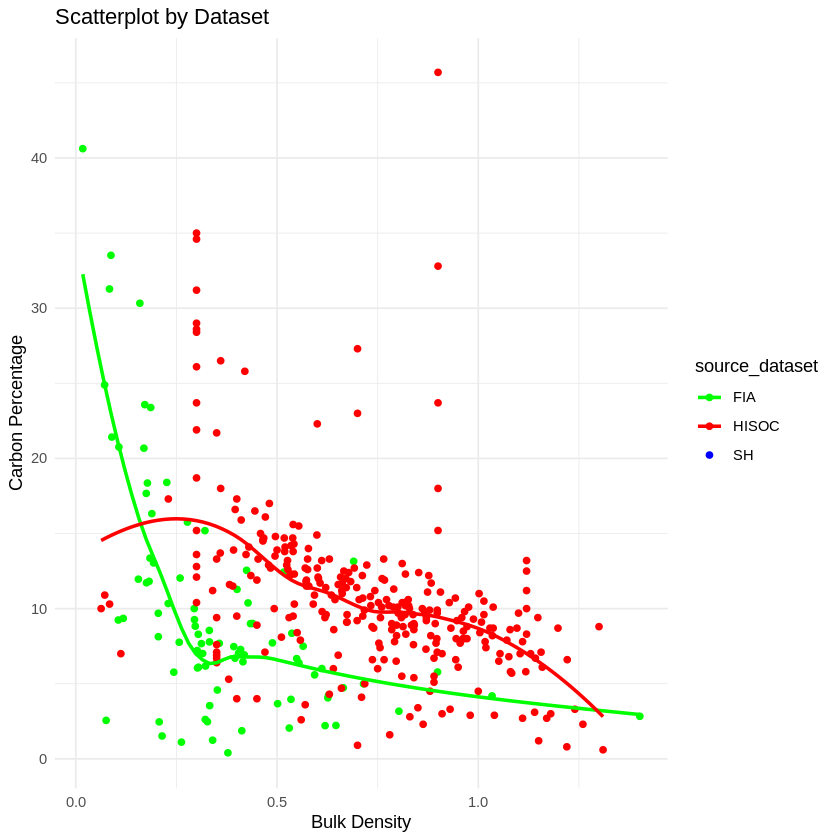

In [56]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("FIA", "HISOC", "SH"))]

subset_data <- combined_dt[depth_bottom %in% c(15, 20),]

ggplot(subset_data, aes(x = bulk_density, y = c_perc, color = source_dataset)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

original plan: for HISOC and SH, get mean bulk density to fill in for given data cuts: 0-0.5, 0.5-1, 1-1.5, >1.5, just for 0-15, 0-20 cm deths for now. Revised plan: model relationship between Db and SOC by depth to fill in missing data

first get mean bulk density clusters by quantile

Warning message:
“Removed 627 rows containing missing values or values outside the scale range
(`geom_point()`).”


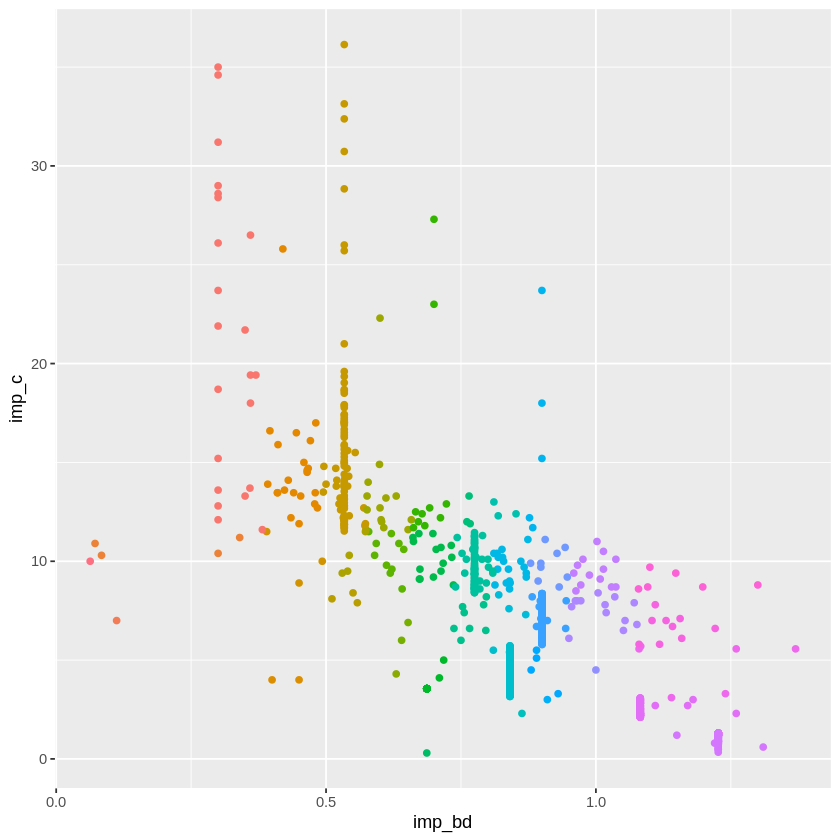

In [57]:
# Subset data for HISOC and SH datasets and specified depth increments
subset_dt <- combined_dt[source_dataset %in% c("HISOC", "SH") &
                           (depth_top == 0 & depth_bottom %in% c(15, 20)), ]

# Define clusters based on bulk_density
subset_dt[,bd_clusters:=cut(bulk_density, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(c_perc, breaks = quantile(c_perc,seq(0,1,.1),na.rm=T))]


# Calculate mean bulk_density for each cluster and c_perc
subset_dt[, mean_bd := mean(bulk_density, na.rm = TRUE), by = .( c_clusters)]

subset_dt[, mean_c := mean(c_perc, na.rm = TRUE), by = .(bd_clusters)]

subset_dt[, imp_bd := ifelse(!is.na(bulk_density),bulk_density,mean_bd)]

subset_dt[, imp_c := ifelse(!is.na(c_perc),c_perc,mean_c)]


# Define clusters based on bulk_density
subset_dt[,bd_clusters:=cut(imp_bd, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(imp_c, breaks = quantile(c_perc,seq(0,1,.1),na.rm=T))]



subset_dt %>%
  ggplot(aes(x=imp_bd,y=imp_c))+
  geom_point(aes(color = paste(bd_clusters,c_clusters) )) +
  theme(legend.position = "none")



In [58]:
sort(unique(combined_dt$depth_top))

[1] "0"   "10"  "100" "11"  "12"  "120" "13"  "14"  "140" "15"  "16"  "160"
[13] "17"  "18"  "180" "19"  "2"   "20"  "200" "21"  "22"  "220" "23"  "24" 
[25] "25"  "26"  "27"  "28"  "29"  "30"  "31"  "32"  "34"  "35"  "36"  "37" 
[37] "38"  "39"  "4"   "40"  "41"  "42"  "43"  "44"  "45"  "46"  "47"  "48" 
[49] "5"   "50"  "52"  "54"  "55"  "58"  "6"   "60"  "62"  "66"  "7"   "70" 
[61] "71"  "72"  "75"  "77"  "78"  "8"   "80"  "9"   "90"

In [59]:
sort(unique(combined_dt$depth_bottom))

[1] "10"   "100"  "105"  "11"   "110"  "12"   "12.5" "120"  "13"   "135" 
[11] "14"   "140"  "15"   "152"  "16"   "160"  "17"   "18"   "180"  "19"  
[21] "2"    "20"   "200"  "21"   "22"   "220"  "23"   "24"   "240"  "25"  
[31] "26"   "27"   "28"   "29"   "30"   "31"   "32"   "34"   "35"   "36"  
[41] "37"   "38"   "39"   "4"    "40"   "41"   "42"   "43"   "44"   "45"  
[51] "46"   "47"   "48"   "5"    "50"   "51"   "52"   "54"   "55"   "56"  
[61] "58"   "59"   "6"    "60"   "61"   "62"   "64"   "65"   "66"   "67"  
[71] "7"    "70"   "71"   "72"   "73"   "75"   "76"   "77"   "78"   "80"  
[81] "81"   "85"   "9"    "90"   "91.5" "92"   "94"   "97"

In [60]:
sum(is.na(combined_dt[source_dataset %in% c("HISOC") &
                                               (depth_top == 40 & depth_bottom %in% c(60)),
                                               .(bulk_density)]$bulk_density) |
                            combined_dt[source_dataset %in% c("HISOC") &
                                        (depth_top == 40 & depth_bottom %in% c(60)),
                                        .(bulk_density)]$bulk_density == "")

[1] 499

Warning message:
“Removed 1 row containing non-finite outside the scale range (`stat_bin()`).”


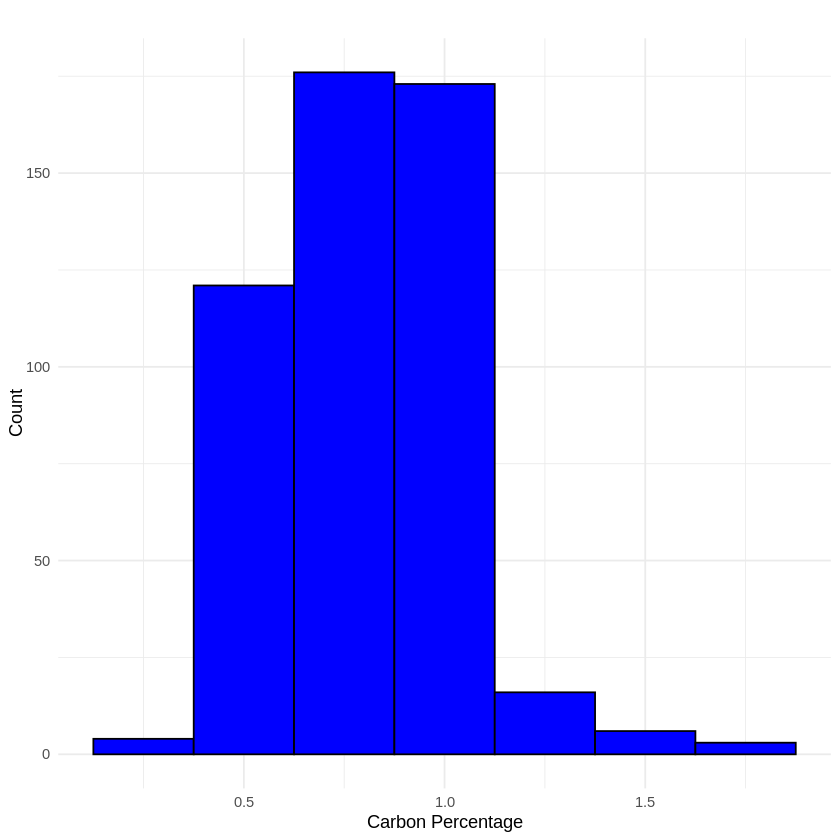

In [61]:
combined_dt[source_dataset %in% c("HISOC") &
                         (depth_top == 40 & depth_bottom %in% c(60)),
                         .(c_perc, bulk_density)] %>%

ggplot( aes(x = c_perc)) +
  geom_histogram(binwidth = 0.25, fill = "blue", color = "black") +
  labs(x = "Carbon Percentage", y = "Count", title = "") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 500 rows containing missing values or values outside the scale range
(`geom_point()`).”


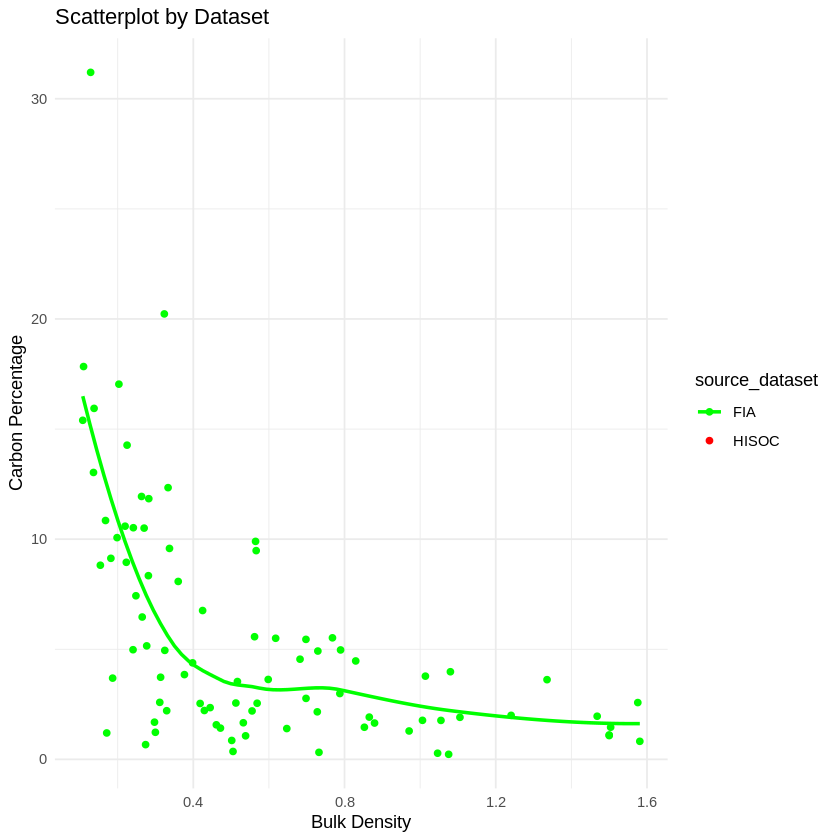

In [62]:
combined_dt[, source_dataset := factor(source_dataset, levels = c("FIA", "HISOC", "SH"))]

subset_data <- combined_dt[depth_top == 40 & depth_bottom %in% c(60),]

ggplot(subset_data, aes(y = c_perc, x = bulk_density, color = source_dataset)) +
  geom_point() +
  geom_smooth(method = "loess", se = FALSE, na.rm = TRUE, aes(group = source_dataset)) +
  labs(x = "Bulk Density", y = "Carbon Percentage", title = "Scatterplot by Dataset") +
  theme_minimal() +
  scale_color_manual(values = c("HISOC" = "red", "SH" = "blue", "FIA" = "green"))

In [63]:
subset_dt[source_dataset=="HISOC"]$c_perc %>% table

.
 0.6  0.8  1.1  1.2  1.3  1.4  1.5  1.6  1.7  1.8  1.9    2  2.1  2.2  2.3  2.7 
   1    2    4   39   68   64   48   81   55   44   34   22   23   12   10    2 
 2.8    3  3.1  3.3    4  4.1  4.3  4.5    5  5.1  5.4  5.5  5.7  5.8    6  6.1 
   1    2    1    2    2    1    1    2    1    1    1    2    1    2    2    2 
 6.5  6.6  6.7  6.8  6.9    7  7.1  7.3  7.4  7.6  7.7  7.8  7.9    8  8.1  8.2 
   2    4    2    1    1    5    2    1    2    1    3    3    2    5    1    3 
 8.3  8.4  8.5  8.6  8.7  8.8  8.9    9  9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8 
   1    2    1    4    6    4    5    3    3    3    1    7    3    6    4    2 
 9.9   10 10.1 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9   11 11.1 11.2 11.3 11.4 
   3    4    5    4    3    5    1    4    2    1    3    2    2    3    1    3 
11.5 11.6 11.7 11.8 11.9   12 12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9   13 
   3    3    3    2    3    3    3    4    3    2    1    2    4    1    3    1 
13.2 13.3 13.5 13.6 13.7 1

bulk density clusters below

Warning message:
“Removed 234 rows containing missing values or values outside the scale range
(`geom_point()`).”


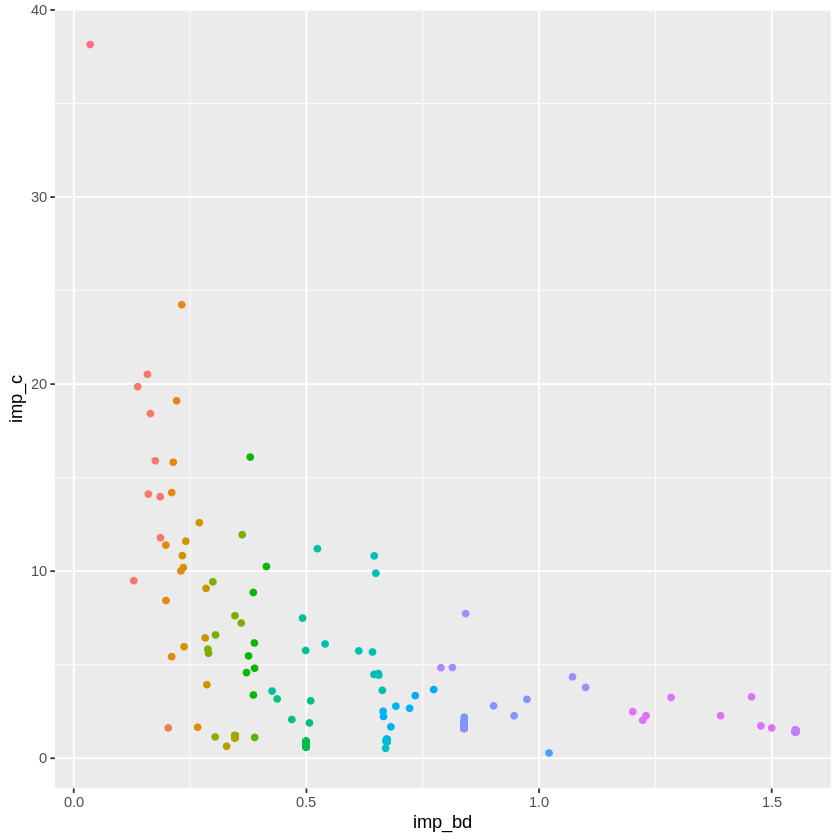

In [64]:
# Subset data for HISOC and FIA datasets and specified depth increments
subset_dt <- combined_dt[source_dataset %in% c("HISOC", "FIA") &
                           (depth_top == 20 & depth_bottom == 40), ]

# # Define clusters based on bulk_density
subset_dt[,epsilon:=rnorm(nrow(subset_dt))*0.000001]
subset_dt[,bd_clusters:=cut(bulk_density, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(c_perc +epsilon, breaks = quantile(c_perc+epsilon,seq(0,1,.1),na.rm=T))]

# Calculate mean bulk_density for each cluster and c_perc
subset_dt[, mean_bd := mean(bulk_density, na.rm = TRUE), by = .( c_clusters)]

subset_dt[, mean_c := mean(c_perc, na.rm = TRUE), by = .(bd_clusters)]

subset_dt[, imp_bd := ifelse(!is.na(bulk_density),bulk_density,mean_bd)]

subset_dt[, imp_c := ifelse(!is.na(c_perc),c_perc,mean_c)]


# Define clusters based on bulk_density
subset_dt[,bd_clusters:=cut(imp_bd, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(imp_c, breaks = quantile(c_perc+epsilon,seq(0,1,.1),na.rm=T))]



subset_dt %>%
  ggplot(aes(x=imp_bd,y=imp_c))+
  geom_point(aes(color = paste(bd_clusters,c_clusters) )) +
  theme(legend.position = "none")

Warning message:
“Removed 233 rows containing missing values or values outside the scale range
(`geom_point()`).”


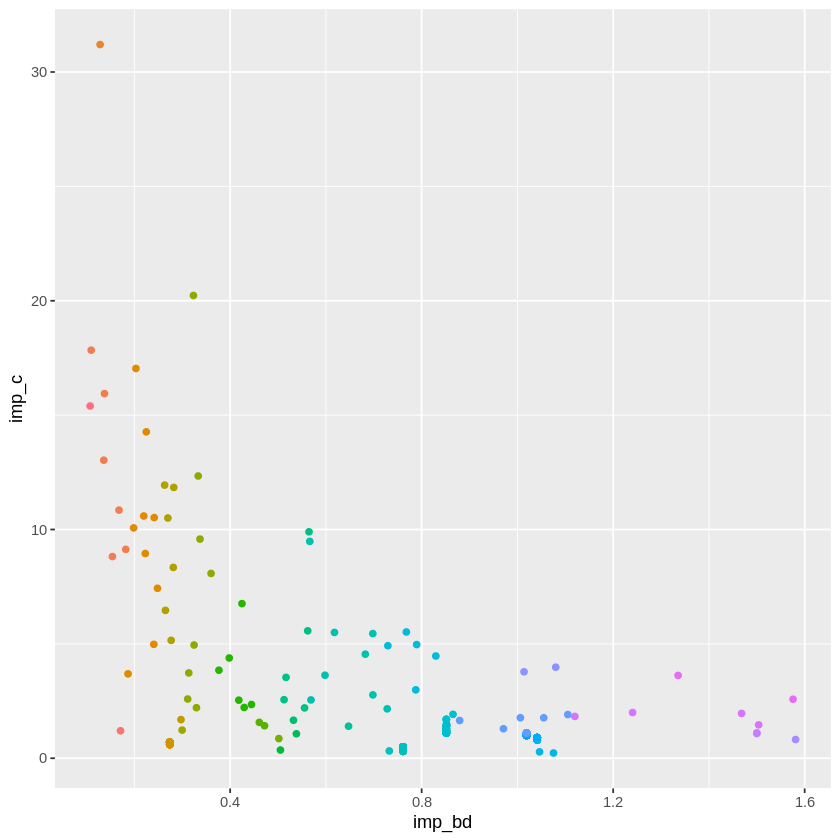

In [65]:
# Subset data for HISOC and FIA datasets and specified depth increments
subset_dt <- combined_dt[source_dataset %in% c("HISOC", "FIA") &
                           (depth_top == 40 & depth_bottom == 60), ]

# # Define clusters based on bulk_density
subset_dt[,epsilon:=rnorm(nrow(subset_dt))*0.000001]
subset_dt[,bd_clusters:=cut(bulk_density, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(c_perc +epsilon, breaks = quantile(c_perc+epsilon,seq(0,1,.1),na.rm=T))]

# Calculate mean bulk_density for each cluster and c_perc
subset_dt[, mean_bd := mean(bulk_density, na.rm = TRUE), by = .( c_clusters)]

subset_dt[, mean_c := mean(c_perc, na.rm = TRUE), by = .(bd_clusters)]

subset_dt[, imp_bd := ifelse(!is.na(bulk_density),bulk_density,mean_bd)]

subset_dt[, imp_c := ifelse(!is.na(c_perc),c_perc,mean_c)]


# Define clusters based on bulk_density
subset_dt[,bd_clusters:=cut(imp_bd, breaks = quantile(bulk_density,seq(0,1,.1),na.rm=T))]
subset_dt[,c_clusters:=cut(imp_c, breaks = quantile(c_perc+epsilon,seq(0,1,.1),na.rm=T))]



subset_dt %>%
  ggplot(aes(x=imp_bd,y=imp_c))+
  geom_point(aes(color = paste(bd_clusters,c_clusters) )) +
  theme(legend.position = "none")

In [66]:
combined_dt %>% names

[1] "number"                                    
  [2] "site_name"                                 
  [3] "site_number"                               
  [4] "plot_name"                                 
  [5] "plot_area"                                 
  [6] "depth_top"                                 
  [7] "depth_bottom"                              
  [8] "soil_column_id"                            
  [9] "replicate"                                 
 [10] "latitude"                                  
 [11] "longitude"                                 
 [12] "primary_project"                           
 [13] "secondary_project"                         
 [14] "tertiary project"                          
 [15] "land_ownership"                            
 [16] "old_sh_1"                                  
 [17] "sh_1"                                      
 [18] "barcode"                                   
 [19] "date_sampled"                              
 [20] "island"                                    
 [21] "current_land_use"                          
 [22] "years_under_current_land_use"              
 [23] "most_previous_land_use"                    
 [24] "years_under_most_previous _land_use"       
 [25] "additional_previous _land_use "            
 [26] "years_under_additional_previous _land_use" 
 [27] "additional_previous_land_use_2"            
 [28] "years_under_additional_previous_land_use_2"
 [29] "additional_previous_land_use_3"            
 [30] "years_under_additional_previous_land_use_3"
 [31] "current_plant_cover"                       
 [32] "previous_crop_cover"                       
 [33] "tillage"                                   
 [34] "tillage_frequency"                         
 [35] "herbicide"                                 
 [36] "pesticide"                                 
 [37] "irrigation_type"                           
 [38] "additional_soil_cover"                     
 [39] "soil_series"                               
 [40] "management_category"                       
 [41] "pial_none"                                 
 [42] "distlevel"                                 
 [43] "order"                                     
 [44] "minerals"                                  
 [45] "swc_fm"                                    
 [46] "swc_ad"                                    
 [47] "toc"                                       
 [48] "tn"                                        
 [49] "co2_burst"                                 
 [50] "beta_glucosidase"                          
 [51] "beta_glucosaminidase"                      
 [52] "pnm_init"                                  
 [53] "pmn_fin"                                   
 [54] "ph"                                        
 [55] "doc"                                       
 [56] "tdn"                                       
 [57] "din"                                       
 [58] "don"                                       
 [59] "hwec"                                      
 [60] "hwen"                                      
 [61] "whc"                                       
 [62] "wsa_mega"                                  
 [63] "wsa_macro"                                 
 [64] "bd"                                        
 [65] "shs"                                       
 [66] "assessment"                                
 [67] "c_n"                                       
 [68] "doc_don"                                   
 [69] "pmn"                                       
 [70] "status"                                    
 [71] "hyperlinks"                                
 [72] "last updated"                              
 [73] "unique_id"                                 
 [74] "c_perc"                                    
 [75] "pubid"                                     
 [76] "dataid"                                    
 [77] "location"                                  
 [78] "land_use"                                  
 [79] "soil_cover"      

In [67]:
# combined_dt[c_perc >5] %>%
#   ggplot(aes(x=depth_bottom %>% as.numeric,y = c_perc/max(c_perc)))+
#   geom_bin2d()+
#   geom_smooth(method = 'lm')

combined_dt[,c_perc_norm := c_perc]
combined_dt[,bd_norm := bulk_density]

combined_dt[,depth_mid := ((depth_bottom %>% as.numeric)+(depth_top %>% as.numeric))/2]

c_perc_delta <- lm(c_perc_norm~depth_mid,combined_dt[c_perc >5 &!is.na(depth_mid) & !is.na(c_perc_norm)])
bd_delta <- lm(bd_norm~depth_mid,combined_dt[c_perc >5 &!is.na(depth_mid) & !is.na(bd_norm)])

predict(c_perc_delta,data.table(depth_mid = 19))-predict(c_perc_delta,data.table(depth_mid = 20))

1 
0.06968404

In [68]:
combined_dt$depth_bottom <- combined_dt$depth_bottom %>% as.numeric

In [69]:
combined_dt[,depth_top:=depth_top %>% as.numeric]
combined_dt[,depth_bottom:=depth_bottom %>% as.numeric]

In [70]:
c_perc_depth_lm <- lm(c_perc~depth_top+depth_bottom,combined_dt[c_perc >0 &!is.na(depth_mid) & !is.na(c_perc_norm)])

In [71]:
c_perc_depth_lm %>% summary


Call:
lm(formula = c_perc ~ depth_top + depth_bottom, data = combined_dt[c_perc > 
    0 & !is.na(depth_mid) & !is.na(c_perc_norm)])

Residuals:
   Min     1Q Median     3Q    Max 
-6.383 -3.485 -1.717  1.819 65.477 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   7.192703   0.190500  37.757  < 2e-16 ***
depth_top     0.020259   0.009358   2.165   0.0304 *  
depth_bottom -0.066963   0.008980  -7.457 9.98e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.588 on 6799 degrees of freedom
Multiple R-squared:  0.1195,	Adjusted R-squared:  0.1193 
F-statistic: 461.5 on 2 and 6799 DF,  p-value: < 2.2e-16


In [73]:
table(combined_dt$depth_top)
# table(combined_dt$depth_bottom)


   0    2    4    5    6    7    8    9   10   11   12   13   14   15   16   17 
2251    3    2   83    1   12    4    1   68    5   12    5    4  222    6    3 
  18   19   20   21   22   23   24   25   26   27   28   29   30   31   32   34 
  70    1  617    4    7   19   12   26    7    2   13    2  250    2    2    5 
  35   36   37   38   39   40   41   42   43   44   45   46   47   48   50   52 
   5   64    2    3    2  596    2    4    2    2    1    2    2    1  237    1 
  54   55   58   60   62   66   70   71   72   75   77   78   80   90  100  120 
  61    1    1  577    1    1    6    1   60  205    1    1  569   60  427   40 
 140  160  180  200  220 
  40   40   39   38   37 

In [74]:
# qplot(pred_vec_a/pred_vec_b,vline=1)

In [75]:
# combined_dt$c_perc*(pred_vec_a/pred_vec_b)

In [76]:
# combined_dt[c_perc >5] %>%
#   ggplot(aes(x=depth_bottom %>% as.numeric,y = c_perc))+
#   geom_bin2d()+
#   geom_smooth(method = 'lm')

In [77]:
# combined_dt[c_perc >0 &!is.na(depth_mid) & !is.na(c_perc_norm)][,list(c_perc = mean(c_perc,na.rm=T)),by = .(depth_adj_bottom)]

In [78]:
# names(combined_dt)

In [79]:
# combined_dt[,c_perc_norm := c_perc]
# combined_dt[,bd_norm := bulk_density]
# #[!is.na(depth_mid) & !is.na(c_perc_norm)]

# combined_dt[,depth_mid := ((depth_bottom %>% as.numeric)+(depth_top %>% as.numeric))/2]

# # combined_dt$depth_mid

c_perc_delta <- lm(c_perc~depth_mid,combined_dt)
bd_delta <- lm(bd_norm~depth_mid,combined_dt)

# predict(c_perc_delta,data.table(depth_mid = 19))-predict(c_perc_delta,data.table(depth_mid = 20))

In [80]:
# combined_dt[c_perc >5 &!is.na(depth_mid) & !is.na(c_perc_norm)] %>%
# ggplot(aes(x=depth_mid,y=c_perc))+
#   geom_bin2d() +
#   geom_smooth(method='lm')

Warning message:
“Removed 4142 rows containing non-finite outside the scale range
(`stat_bin2d()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 4142 rows containing non-finite outside the scale range
(`stat_smooth()`).”


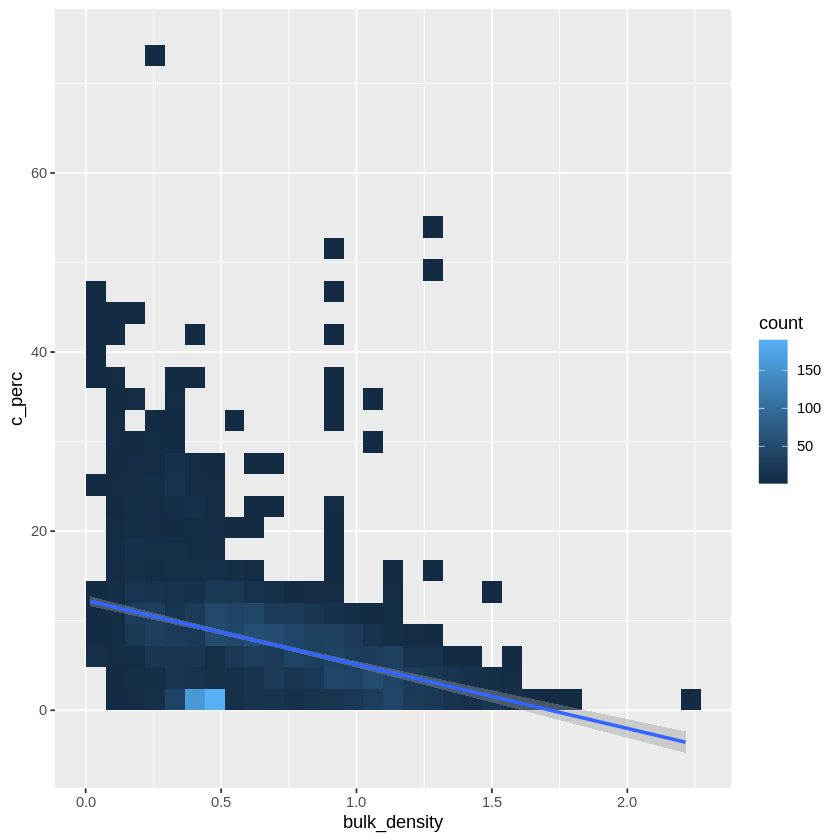

In [81]:
combined_dt %>%
  ggplot(aes(x=bulk_density,y=c_perc))+
  geom_bin2d() +
  geom_smooth(method='lm')

In [82]:
mid_points <- c(20,40,60,80,100)

In [83]:
# (predict(c_perc_delta,data.table(depth_mid = depth_mid))-predict(c_perc_delta,data.table(depth_mid = mid_points[which.min(sqrt((depth_mid-mid_points)^2))])) %>% unlist)

In [84]:
depth_old = 10
depth_new = 100
c_perc = 13
c_perc*(predict(c_perc_delta,data.table(depth_mid = depth_new))/
predict(c_perc_delta,data.table(depth_mid = depth_old)))



1 
3.447134

In [85]:
adj_carbon <- function(depth_orig,depth_new,c_perc){
c_perc*(predict(c_perc_delta,data.table(depth_mid = depth_new))/
predict(c_perc_delta,data.table(depth_mid = depth_old)))
}

In [86]:
adj_bd <- function(depth_orig,depth_new,bulk_density){
bulk_density*(predict(bd_delta,data.table(depth_mid = depth_new))/
predict(bd_delta,data.table(depth_mid = depth_old)))
}

In [87]:
depth_adj <- function(depth_mid){
mid_points[which.min(sqrt((depth_mid-mid_points+0.01)^2))]
}

In [88]:
depth_mid = NULL

In [89]:
# mid_points

In [90]:
combined_dt[,depth_adj_bottom :=depth_adj(depth_mid),by=1:nrow(combined_dt)]

In [91]:
bd_pred <- lm(bd_norm~depth_adj_bottom+c_perc_norm,combined_dt)
carb_pred <- lm(c_perc_norm ~depth_adj_bottom+bd_norm,combined_dt)


In [92]:
bd_norm_pred <- predict(bd_pred,combined_dt)
carb_norm_pred <- predict(carb_pred,combined_dt)

In [93]:
combined_dt$c_perc[is.na(combined_dt$c_per)] <- carb_norm_pred[is.na(combined_dt$c_per)]
combined_dt$bulk_density[is.na(combined_dt$bulk_density)] <- bd_norm_pred[is.na(combined_dt$bulk_density)]

In [94]:
# combined_dt$depth_bottom

In [95]:
combined_dt[,c_perc_adj :=adj_carbon(depth_bottom,depth_adj_bottom,c_perc),by=1:nrow(combined_dt)]

In [96]:
adj_vec <- data.table(depth_top = c(70,80),depth_bottom = c(90,100)) %>% predict(c_perc_depth_lm,.)

pred_vec_a <- combined_dt %>% predict(c_perc_depth_lm,.)
pred_vec_b <- data.table(depth_top = combined_dt$depth_adj_bottom-20,depth_bottom = combined_dt$depth_adj_bottom) %>% predict(c_perc_depth_lm,.)

(adj_vec[2]/adj_vec[1])

2 
0.8192744

In [97]:
combined_dt$c_perc_adj <-  combined_dt$c_perc+combined_dt$c_perc*(1-pred_vec_a/pred_vec_b)

In [98]:
combined_dt$c_perc_adj[is.na(combined_dt$c_perc_adj)] <- combined_dt$c_perc[is.na(combined_dt$c_perc_adj)]

In [99]:
combined_dt$c_perc_adj[combined_dt$c_perc_adj<0 &!is.na(combined_dt$c_perc)] <- combined_dt$c_perc[combined_dt$c_perc_adj<0  &!is.na(combined_dt$c_perc)]

In [100]:
combined_dt[,bulk_density_adj := adj_bd(depth_bottom,depth_adj_bottom,bulk_density),by=1:nrow(combined_dt)]

In [101]:
combined_dt$depth_adj_bottom

[1]  20  40  60  80 100  20  40  60  80 100  20  40  60  80 100  20  60  80
  [19] 100  40  20  40  60  80 100  20  40  80 100  60  20  40  60  80 100  20
  [37]  40  60 100  80  20  40  60  80 100  20  40  60  80 100  20  40  60  80
  [55] 100  20  40  60  80 100  20  40  60  80 100 100  20  40  60  80  20  40
  [73]  60  80 100  20  40  60  80 100  20  40  60  80 100  20  40  60  80 100
  [91]  20  40  60  80 100  20  40  60  80 100  20  40  80 100  60  20  40  80
 [109] 100  60  20  40  60 100  80  20  60  80 100  40  20  40  60  80 100  20
 [127]  40  60  80 100  20  40  60  80 100  20  40  60  80 100  20  40  60  80
 [145] 100  20  40  60  80 100  20  40  60 100  80  40  60  80 100  20  20  40
 [163]  60  80 100  20  60  80 100  40  20  40  60  80 100  20  40  60  80 100
 [181]  20  40  60  80 100  20  40  60  80 100  40  60  80 100  20  20  40  60
 [199]  80 100  20  40  60  80 100  20  40  60  80 100  20  40  60  80 100  20
 [217]  40  60  80 100  20  40  60  80 100  20  60  80 100  40  20  40  60 100
 [235]  80  20  40  60  80 100  20  40  60  80 100  20  40  60  80 100  60  80
 [253] 100  20  40  20  40  60  80 100  20  40  60  80 100  20  40  60  80 100
 [271]  20  40  60  80 100  20  40  60  80 100  20  40  60  80 100  20  40  60
 [289]  80 100  20  40  60  80 100  20  40  80 100  60  20  40  60  80 100  20
 [307]  40  60  80 100  20  40  60  80 100  20  40  60  80 100  20  40  80 100
 [325]  60  20  40  60  80 100  20  40  60  80 100  20  40  60  80 100  20  40
 [343]  60  80 100  20  40  60 100  80  20  40  60  80 100  20  40  60  80 100
 [361]  20  40  60  80 100  20  40  60  80 100  20  40  60  80 100  20  40  60
 [379] 100  80  20  40  60  80 100  20  40 100  60  80  20  40  60  80 100  20
 [397]  40  60 100  80  20  60  80  40 100  20  40  60  80 100  20  60  80 100
 [415]  40  20  60  80 100  40  20  40  60  80 100  20  40  60  80 100  20  20
 [433]  20  20  20  20  20  20  40  40  40  40  80  80  80  80  20  20  20  20
 [451]  20  20  20  20  40  40  40  40  80  80  80  80  20  20  20  20  20  20
 [469]  20  20  40  40  40  40  80  80  80  20  20  20  20  20  20  40  40  40
 [487]  80  80  80  20  20  20  20  20  20  40  40  40  80  80  80  20  20  20
 [505]  20  20  20  40  40  40  80  80  80  20  20  20  20  20  20  40  40  40
 [523]  80  80  80  20  20  20  20  20  20  20  20  40  40  40  40  80  80  80
 [541]  80  20  20  20  20  20  20  20  20  40  40  40  40  80  80  80  80  20
 [559]  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  40  40
 [577]  20  20  20  20  20  40  40  20  20  20  20  20  40  40  20  20  20  20
 [595]  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20
 [613]  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20
 [631]  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20
 [649]  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20
 [667]  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20  20
 [685]  20  20  20  40  20  20  20  20  40  40  60  80  20  20  20  20  40  60
 [703]  80  20  20  20  20  40  60  80  80  20  20  20  20  40  40  60  20  20
 [721]  20  20  20  20  40  40  60  20  20  20  20  20  20  20  20  20  20  20
 [739]  20  40  20  20  20  40  20  20  20  40  20  40  20  40  20  20  20  20
 [757]  20  20  20  60  20  60  20  40  60 100  20  40  60 100  20  20  20  20
 [775]  20  20  20  20  20  20  20  40  60  80  20  20  20  20  20  20  20  20
 [793]  20  20  20  20  20  20  20  20  20  20  40  60  80  20  20  40  60  80
 [811]  20  20  40  60  80  20  20  40  60  80  20  20  40  60  80  20  20  40
 [829]  60  80  20  20  40  60  80  20  20  40  60  80  20  20  40  60  80  20
 [847]  20  40  60  80  20  20  40  60  80  20  20  40  60  80  20  20  40  60
 [865]  80  20  20  40  60  80  20  20  40  60  80  20  20  40  60  80  20  20
 [883]  40  60  80  20  20  40  60  80  20  20  40  60  80  20  20  40  60  80
 [901]  20  20  40  60  80  20  20  40  60  80  20  2

Warning message:
“Removed 51 rows containing missing values or values outside the scale range
(`geom_point()`).”


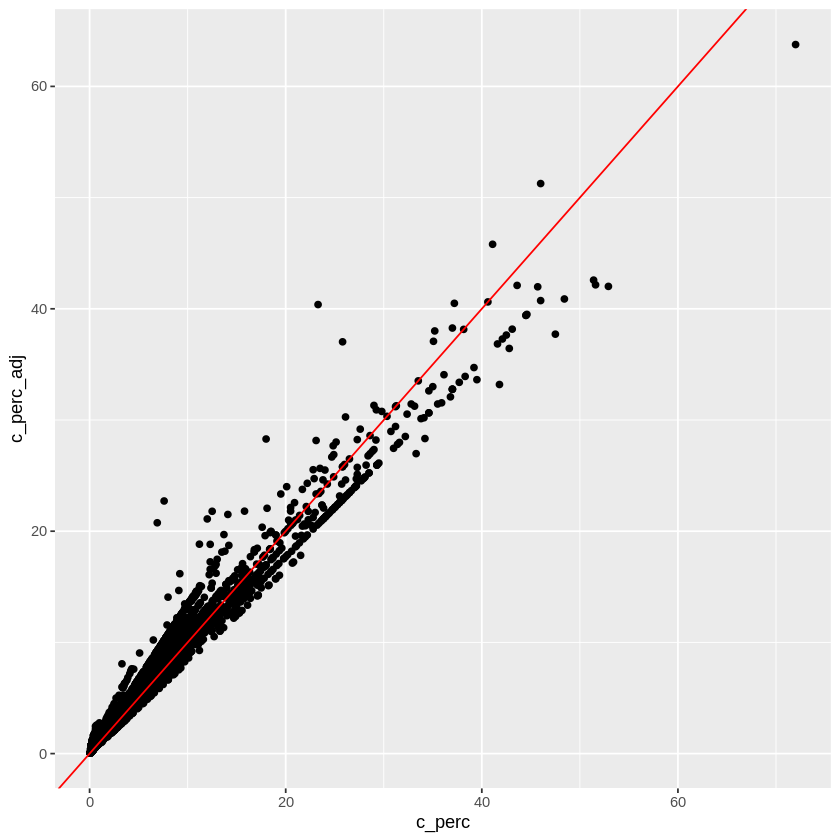

In [102]:
combined_dt %>%
  ggplot(aes(x=c_perc,y=c_perc_adj))+
  geom_point() +
  geom_abline(color='red')
  # facet_wrap()

Warning message:
“Removed 32 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


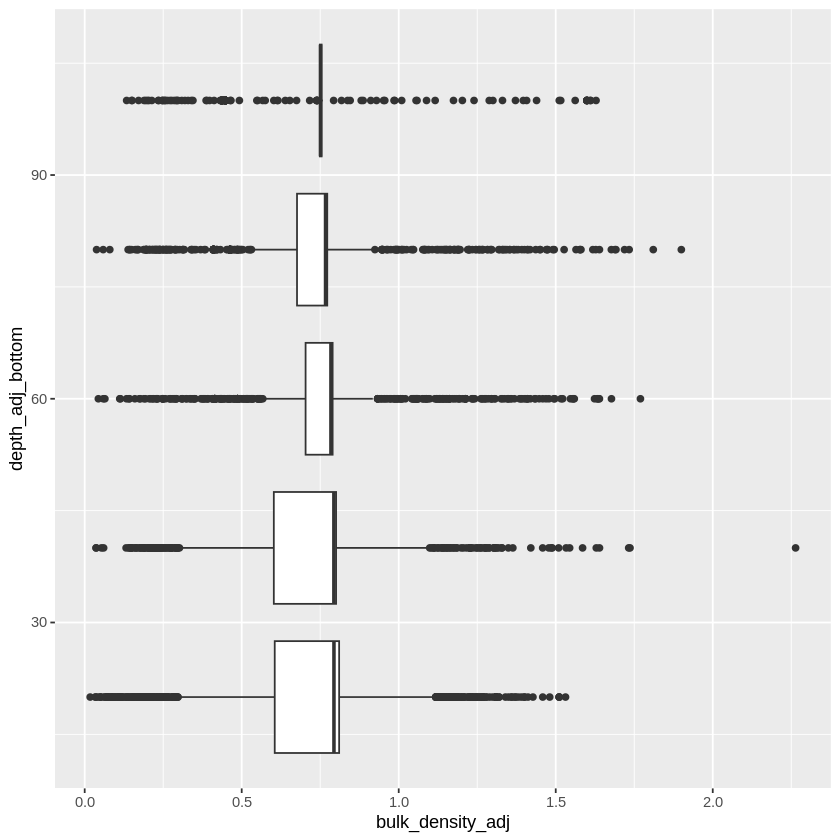

In [103]:
combined_dt %>%
  ggplot(aes(x=bulk_density_adj,y=depth_adj_bottom))+
  geom_boxplot(aes(group=depth_adj_bottom)) +
  geom_abline(color='red')
  # facet_wrap(~depth_adj_bottom)


In [104]:
# subset_dt[, mean_bd := mean(bulk_density_adj, na.rm = TRUE), by = .( c_clusters,depth_adj_bottom,source_dataset)]


In [105]:
subset_dt$c_clusters <- NULL
subset_dt$bd_clusters <- NULL

In [106]:
subset_dt %>% nrow

[1] 586

In [107]:
subset_dt$imp_bd %>% is.na %>% table

.
FALSE  TRUE 
  353   233 

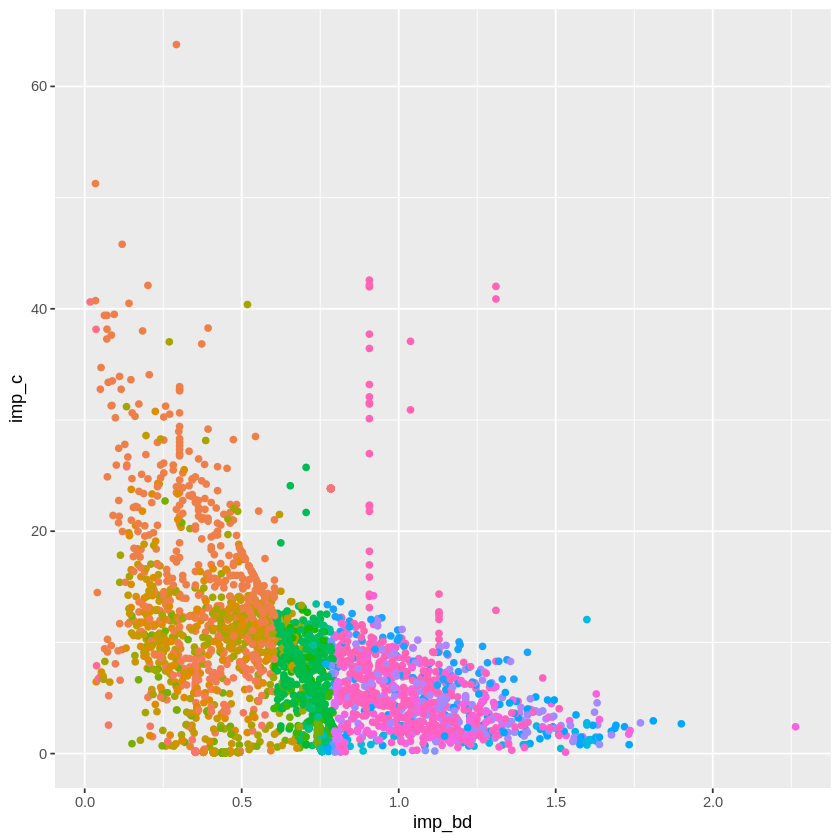

In [108]:

subset_dt <- combined_dt[ , ]

# # Define clusters based on bulk_density
subset_dt[,epsilon:=rnorm(nrow(subset_dt))*0.000001]
subset_dt[,count_n:=length(source_dataset),by = .(depth_adj_bottom)]

subset_dt[,bd_clusters:=cut(bulk_density_adj , breaks = quantile((bulk_density_adj[!is.na(bulk_density_adj)] ),seq(0,1,.25),na.rm=T)),by = .(depth_adj_bottom)]
subset_dt[,c_clusters:=cut(c_perc_adj , breaks = quantile((c_perc_adj[!is.na(c_perc_adj)]),seq(0,1,.25),na.rm=T)),by = .(depth_adj_bottom)]


# Calculate mean bulk_density for each cluster and c_perc
subset_dt[, mean_bd := mean(bulk_density_adj, na.rm = TRUE), by = .( c_clusters)]

subset_dt[, mean_c := mean(c_perc_adj, na.rm = TRUE), by = .(bd_clusters)]

subset_dt[, imp_bd := ifelse(!is.na(bulk_density_adj),bulk_density_adj,mean_bd),by=1:nrow(subset_dt)]

subset_dt[, imp_c := ifelse(!is.na(c_perc_adj),c_perc_adj, mean_c)]



subset_dt %>%
  ggplot(aes(x=imp_bd,y=imp_c))+
  geom_point(aes(color = paste(bd_clusters,c_clusters) )) +
  theme(legend.position = "none")

In [109]:
combined_dt[,n_lat_lon:=length(unique_id),by=.(latitude,longitude)]

In [110]:
combined_dt$soil_column_id %>% table %>% unlist %>% table %>% sum

[1] 1975

In [111]:
summary_table <- combined_dt[, .(mean_c_perc = mean(c_perc_adj, na.rm = TRUE),
                                 min_c_perc = min(c_perc_adj, na.rm = TRUE),
                                 max_c_perc = max(c_perc_adj, na.rm = TRUE),
                                 mean_bulk_density = mean(bulk_density_adj, na.rm = TRUE),
                                 min_bulk_density = min(bulk_density_adj, na.rm = TRUE),
                                 max_bulk_density = max(bulk_density_adj, na.rm = TRUE)),
                            by = .(source_dataset, depth_top, depth_bottom)] %>% print



     source_dataset depth_top depth_bottom mean_c_perc min_c_perc max_c_perc
             <fctr>     <num>        <num>       <num>      <num>      <num>
  1:            FIA         0           20    9.853035   0.400000  40.620000
  2:            FIA        20           40    7.228186   0.280000  38.150000
  3:            FIA        40           60    5.589035   0.230000  31.200000
  4:            FIA        60           80    4.747791   0.110000  28.600000
  5:            FIA        80          100    4.322907   0.130000  25.790000
 ---                                                                        
310:             SH        10           30   11.003037  11.003037  11.003037
311:             SH         0           10   14.638995  14.638995  14.638995
312:             SH        28           46    3.198614   3.198614   3.198614
313:             SH        46           66    3.285861   3.285861   3.285861
314:             SH        66          100    1.049311   1.049311   1.049311

not calculating C stock below 1 m since no bulk density estimates for those data

In [112]:
subset_dt %>% names

[1] "number"                                    
  [2] "site_name"                                 
  [3] "site_number"                               
  [4] "plot_name"                                 
  [5] "plot_area"                                 
  [6] "depth_top"                                 
  [7] "depth_bottom"                              
  [8] "soil_column_id"                            
  [9] "replicate"                                 
 [10] "latitude"                                  
 [11] "longitude"                                 
 [12] "primary_project"                           
 [13] "secondary_project"                         
 [14] "tertiary project"                          
 [15] "land_ownership"                            
 [16] "old_sh_1"                                  
 [17] "sh_1"                                      
 [18] "barcode"                                   
 [19] "date_sampled"                              
 [20] "island"                                    
 [21] "current_land_use"                          
 [22] "years_under_current_land_use"              
 [23] "most_previous_land_use"                    
 [24] "years_under_most_previous _land_use"       
 [25] "additional_previous _land_use "            
 [26] "years_under_additional_previous _land_use" 
 [27] "additional_previous_land_use_2"            
 [28] "years_under_additional_previous_land_use_2"
 [29] "additional_previous_land_use_3"            
 [30] "years_under_additional_previous_land_use_3"
 [31] "current_plant_cover"                       
 [32] "previous_crop_cover"                       
 [33] "tillage"                                   
 [34] "tillage_frequency"                         
 [35] "herbicide"                                 
 [36] "pesticide"                                 
 [37] "irrigation_type"                           
 [38] "additional_soil_cover"                     
 [39] "soil_series"                               
 [40] "management_category"                       
 [41] "pial_none"                                 
 [42] "distlevel"                                 
 [43] "order"                                     
 [44] "minerals"                                  
 [45] "swc_fm"                                    
 [46] "swc_ad"                                    
 [47] "toc"                                       
 [48] "tn"                                        
 [49] "co2_burst"                                 
 [50] "beta_glucosidase"                          
 [51] "beta_glucosaminidase"                      
 [52] "pnm_init"                                  
 [53] "pmn_fin"                                   
 [54] "ph"                                        
 [55] "doc"                                       
 [56] "tdn"                                       
 [57] "din"                                       
 [58] "don"                                       
 [59] "hwec"                                      
 [60] "hwen"                                      
 [61] "whc"                                       
 [62] "wsa_mega"                                  
 [63] "wsa_macro"                                 
 [64] "bd"                                        
 [65] "shs"                                       
 [66] "assessment"                                
 [67] "c_n"                                       
 [68] "doc_don"                                   
 [69] "pmn"                                       
 [70] "status"                                    
 [71] "hyperlinks"                                
 [72] "last updated"                              
 [73] "unique_id"                                 
 [74] "c_perc"                                    
 [75] "pubid"                                     
 [76] "dataid"                                    
 [77] "location"                                  
 [78] "land_use"                                  
 [79] "soil_cover"      

In [113]:
subset_dt$current_land_use %>% unique

[1] NA                                  "Cropland"                         
 [3] "Unmanaged/abandoned"               "Pineapple or sugarcane plantation"
 [5] "Pasture"                           "Managed forest"                   
 [7] "Protected forest"                  "Agroforestry"                     
 [9] "City/state park"                   "Orchard"                          
[11] "Protected Forest"                  ""                                 
[13] "Shrubland"                         "Unmanaged/abandoned cropland"     
[15] "Silvopasture"                      "Unmanaged forest"                 
[17] "cropland"

In [114]:
subset_dt[, current_land_use := tolower(current_land_use)]

In [115]:
subset_dt$current_land_use %>% unique

[1] NA                                  "cropland"                         
 [3] "unmanaged/abandoned"               "pineapple or sugarcane plantation"
 [5] "pasture"                           "managed forest"                   
 [7] "protected forest"                  "agroforestry"                     
 [9] "city/state park"                   "orchard"                          
[11] ""                                  "shrubland"                        
[13] "unmanaged/abandoned cropland"      "silvopasture"                     
[15] "unmanaged forest"

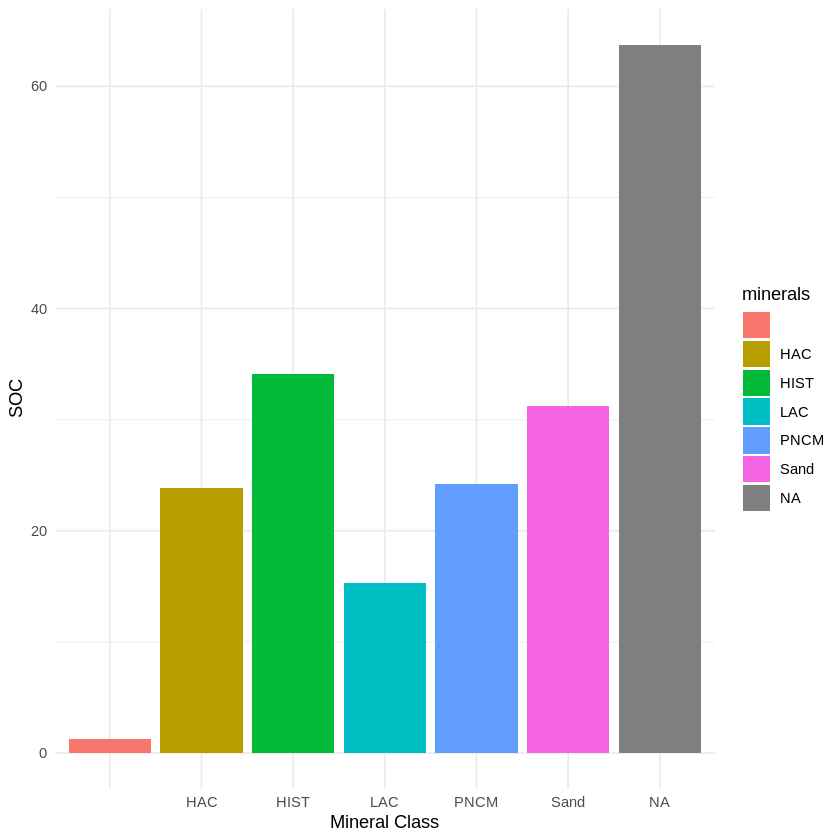

In [116]:
ggplot(subset_dt, aes(x = minerals, y = imp_c, fill = minerals)) +
  geom_bar(stat = "identity", position = "dodge") +
  theme_minimal() +
  labs(x = "Mineral Class", y = "SOC")

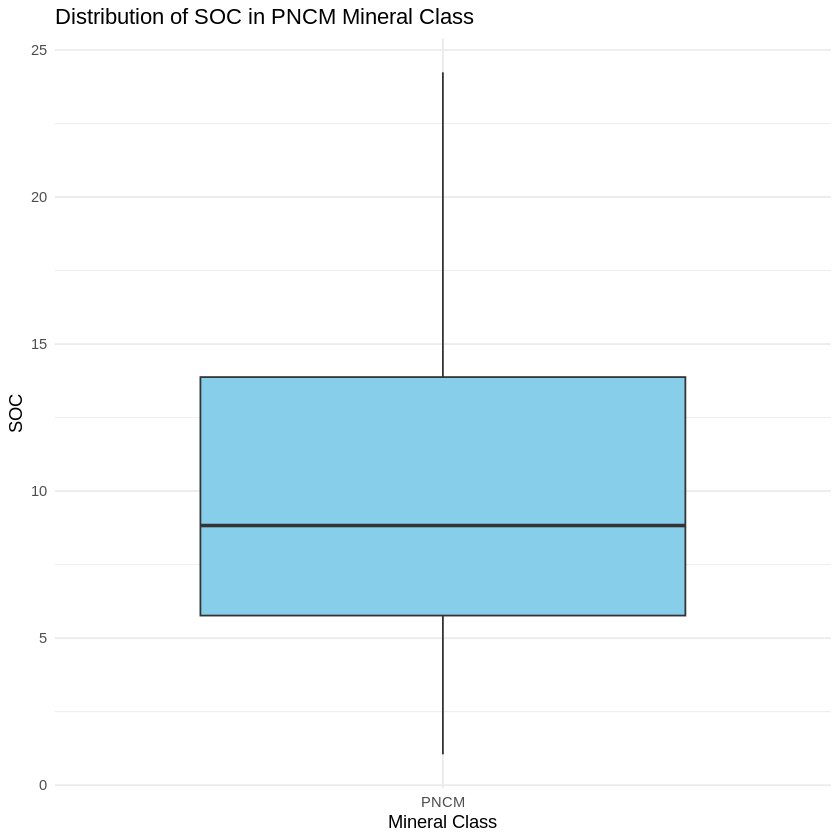

In [117]:
# Filter for mineral class 'PNCM'
pncm_data <- subset(subset_dt, minerals == "PNCM")

# Create a boxplot
ggplot(pncm_data, aes(x = minerals, y = imp_c)) +
  geom_boxplot(fill = "skyblue") +
  theme_minimal() +
  labs(title = "Distribution of SOC in PNCM Mineral Class",
       x = "Mineral Class", y = "SOC")

In [118]:
# Calculate percentiles for each mineral class
percentiles_by_class <- subset_dt[, .(
  SampleCount = .N,
  P25 = quantile(imp_c, probs = 0.25, na.rm = TRUE),
  Median = quantile(imp_c, probs = 0.50, na.rm = TRUE),
  P75 = quantile(imp_c, probs = 0.75, na.rm = TRUE)
), by = minerals]

print(percentiles_by_class)

   minerals SampleCount      P25   Median       P75
     <char>       <int>    <num>    <num>     <num>
1:     <NA>        5904 0.700000 1.300000  6.349365
2:      HAC         543 1.310493 1.866746  4.803570
3:      LAC         176 1.421272 2.116588  3.415296
4:     PNCM         188 5.767584 8.829330 13.877137
5:     HIST          29 4.704576 8.287219 13.227495
6:     Sand          12 3.064103 5.953787  8.185868
7:                    1 1.301065 1.301065  1.301065


In [130]:
# Calculate percentiles for each mineral class x land use
percentiles_by_class_and_use <- subset_dt[, .(
  SampleCount = .N,
  P25 = quantile(imp_c, probs = 0.25, na.rm = TRUE),
  Median = quantile(imp_c, probs = 0.50, na.rm = TRUE),
  P75 = quantile(imp_c, probs = 0.75, na.rm = TRUE)
), by = .(minerals, current_land_use)]

print(percentiles_by_class_and_use)

    minerals                  current_land_use SampleCount        P25    Median
      <char>                            <char>       <int>      <num>     <num>
 1:     <NA>                              <NA>        5904  0.7000000  1.300000
 2:      HAC                          cropland         306  1.2256411  1.390631
 3:      LAC               unmanaged/abandoned          20  1.4916708  1.847890
 4:      LAC                          cropland          78  1.3387772  1.725325
 5:      HAC               unmanaged/abandoned          37  1.6121894  2.121302
 6:     PNCM                          cropland          32  4.1687689  5.775661
 7:      LAC pineapple or sugarcane plantation           3  0.9757988  1.140789
 8:     PNCM                           pasture          57 10.0596847 12.407259
 9:      LAC                    managed forest          18  1.1761440  3.582643
10:     PNCM                    managed forest           8  5.0958384  5.463531
11:     HIST                  protected 

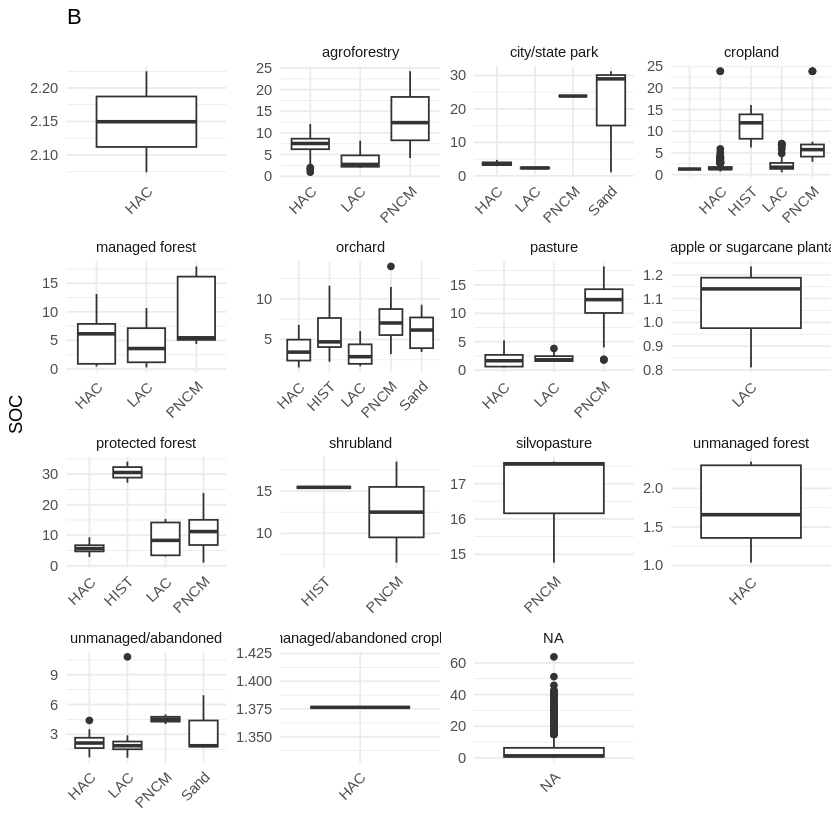

In [132]:
ggplot(subset_dt, aes(x = minerals, y = imp_c)) +
  geom_boxplot() +
  facet_wrap(~current_land_use, scales = "free") +
  labs(title = "B",
       x = "",
       y = "SOC") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))


Reminders to do for publication-level product: Bootstrap simulated distributions for between 70th and 90th percentiles to be able to defend choice of quantiles chosen
Reminder to do sooner: subset by land use x minerals then commit new file to Kathe's github

In [119]:
# Calculate percentiles for each mineral class: 10th, 90th
percentiles_by_class <- subset_dt[, .(
  SampleCount = .N,
  P10 = quantile(imp_c, probs = 0.10, na.rm = TRUE),
  Median = quantile(imp_c, probs = 0.50, na.rm = TRUE),
  P90 = quantile(imp_c, probs = 0.90, na.rm = TRUE)
), by = minerals]

print(percentiles_by_class)

   minerals SampleCount      P10   Median       P90
     <char>       <int>    <num>    <num>     <num>
1:     <NA>        5904 0.400000 1.300000 11.652123
2:      HAC         543 1.131361 1.866746  7.553720
3:      LAC         176 1.235069 2.116588  6.170631
4:     PNCM         188 4.206462 8.829330 16.965902
5:     HIST          29 3.774974 8.287219 18.282793
6:     Sand          12 1.720611 5.953787 27.001815
7:                    1 1.301065 1.301065  1.301065


In [129]:
percentiles_by_class_and_use <- subset_dt[, .(
  SampleCount = .N,
  P10 = quantile(imp_c, probs = 0.10, na.rm = TRUE),
  Median = quantile(imp_c, probs = 0.50, na.rm = TRUE),
  P90 = quantile(imp_c, probs = 0.90, na.rm = TRUE)
), by = .(minerals, current_land_use)]

print(percentiles_by_class_and_use)

    minerals                  current_land_use SampleCount        P10    Median
      <char>                            <char>       <int>      <num>     <num>
 1:     <NA>                              <NA>        5904  0.4000000  1.300000
 2:      HAC                          cropland         306  1.0795069  1.390631
 3:      LAC               unmanaged/abandoned          20  0.6901825  1.847890
 4:      LAC                          cropland          78  1.2350691  1.725325
 5:      HAC               unmanaged/abandoned          37  1.3689468  2.121302
 6:     PNCM                          cropland          32  3.6422723  5.775661
 7:      LAC pineapple or sugarcane plantation           3  0.8768048  1.140789
 8:     PNCM                           pasture          57  5.1608917 12.407259
 9:      LAC                    managed forest          18  0.5185404  3.582643
10:     PNCM                    managed forest           8  4.7960277  5.463531
11:     HIST                  protected 

In [120]:
output_dt <- subset_dt[, .(c_perc,imp_c, bulk_density,imp_bd), by = .(source_dataset,island,soil_column_id,unique_id, depth_top, depth_bottom,depth_adj_bottom,latitude,longitude)]

In [121]:
output_dt %>% lapply(is.na) %>% lapply(which) %>% lapply(length)

$source_dataset
[1] 0

$island
[1] 0

$soil_column_id
[1] 0

$unique_id
[1] 0

$depth_top
[1] 0

$depth_bottom
[1] 0

$depth_adj_bottom
[1] 0

$latitude
[1] 0

$longitude
[1] 0

$c_perc
[1] 51

$imp_c
[1] 0

$bulk_density
[1] 32

$imp_bd
[1] 0

In [122]:
output_dt$hole_id <- paste(output_dt$latitude,output_dt$longitude) %>% factor %>% as.numeric

In [123]:
output_dt$hole_id %>% table %>% unlist %>% table

.
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 366   60   35    6  299    3    2    8    4    5    3   15    2    3   13    7 
  17   18   19   20   21   22   24   36   45   59  132  360  627  628  678 1197 
   3    3    1    1    1    1    1    1    1    1    1    1    1    1    1    1 

In [124]:
# table(output_dt$depth_bottom,output_dt$depth_adj_bottom)
names(output_dt)

[1] "source_dataset"   "island"           "soil_column_id"   "unique_id"       
 [5] "depth_top"        "depth_bottom"     "depth_adj_bottom" "latitude"        
 [9] "longitude"        "c_perc"           "imp_c"            "bulk_density"    
[13] "imp_bd"           "hole_id"

In [126]:
# fwrite(output_dt,'/content/combined_soc_2024_04_05.csv')

In [127]:
# combined_dt[, .(c_perc, bulk_density), by = .(source_dataset, depth_top, depth_bottom)]